In [ ]:
import os
import re 
dir = '/srv/data/'

'''
Retrieve the names of all EEBO-TCP texts 
'''
f1 = 'eebo_phase1_IDs_and_dates.txt'
f2 = 'EEBO_Phase2_IDs_and_dates.txt' 
names = []
def getNamesTXT(folder,f):
    file = os.path.join(folder,f)
    data = open(file,'r')
    data = data.readlines()
    for d in data:
        datum = d.replace('\n','')
        datum = d.split('\t')
        name = datum[0]
        names.append(name)

getNamesTXT(dir,f1)
getNamesTXT(dir,f2)
print(len(names))

In [ ]:
dir = '/srv/data/eebotcp/texts'
'''
Retrieves the IDs, i.e., file names, from the current (June 2022) EP library 
'''
epnames = []
def getNamesEP(folder):
    for f in os.listdir(folder): 
        name = f.split('.')[0]
        if '_' in name:
            name = name.split('_')[0]
            print(name)
        epnames.append(name)

for folder in os.listdir(dir):
    if folder == '.DS_Store':
        continue
    local = os.path.join(dir,folder)
    getNamesEP(local)
    
print(len(epnames))


In [ ]:
'''
Identifies which TCP files are missing from the EP library and 
then writes those names out into a TXT file
'''
epmissing = []
for n in names:
    if n not in epnames:
        epmissing.append(n)

output = '/srv/data/ECBC-Data-2022/Text_Files/EPmissing.txt'
file = open(output,'a+')
count = 0
for name in epmissing:
    count += 1
    file.write(name + '\n')
print(count)
file.close()

In [ ]:
'''
Functions for running stageOne on the TCP files that are missing from the EP library.
This is old code that appends each texts' information into a dataframe in memory. 
Outputs the dataframe as a CSV file after processing the last text.   
'''
from stageOne import convertTCP,dateTXT
import pandas as pd  
dates = dateTXT()

def getFileNames(file):
    phase = open(file,'r')
    phase = phase.readlines()
    files = []
    for entry in phase:
        entry = entry.split(' ')
        id = entry[0]
        fileName = id + '.P4.xml'
        files.append(fileName)
    return files 

def convert(files,folder,csv):
    count = 0
    for f in files:
        subfolder = re.findall('\w{2}',f)[0]
        dir = os.path.join(folder,subfolder) 
        count += 1
        if count % 100 == 0 and count != 0:
            print("Processed " + str(count) + " files so far")
        # initalize output CSV dataframe  
        if count == 1: 
            outFile = convertTCP(dir,f,dates)
            continue
        df = convertTCP(dir,f,dates)
        outFile = pd.concat([outFile,df],ignore_index = True)
    print('The number of total files is ' + str(count))
    outFile.to_csv(csv)

In [ ]:
IFile = '/srv/data/ECBC-Data-2022/Text_Files/relevantEPmissingPhaseI.txt'
IIFile = '/srv/data/ECBC-Data-2022/Text_Files/relevantEPmissingPhaseII.txt'
dir1,dir2 = '/srv/data/allPhase1Extract','/srv/data/allPhase2Extract'
csvI,csvII = '/srv/data/CSVs/phaseImissing.csv','/srv/data/CSVs/phaseIImissing.csv'
filesI, filesII = getFileNames(IFile),getFileNames(IIFile)
convert(filesI,dir1,csvI)
convert(filesII,dir2,csvII)

In [ ]:
'''
Identifies which EP texts have multiple parts
'''
underscores = open('/srv/data/ECBC-Data-2022/Text_Files/EPunderscores.txt','r')
relevant = open('/srv/data/ECBC-Data-2022/Text_Files/relevant.txt','r')
underscores = underscores.readlines()
relevant = relevant.readlines()
u = []
for id in underscores:
    if id in relevant:
        id = id.replace('\n','')
        u.append(id)
print(len(u))

In [ ]:
from functions import keywords
'''
Filters TCP texts by keywords and date. 
'''
folder = '/srv/data/metadata/TCP metadata/'
# output = '/srv/data/metadata/textCounts/virginiaOurTime.txt'
# output = '/srv/data/metadata/textCounts/virginiaTCP.txt'
# output = '/srv/data/metadata/textCounts/eicOurTime.txt'
# output = '/srv/data/metadata/textCounts/eicTCP.txt'
# output = '/srv/data/metadata/textCounts/levantOurTime.txt'
# output = '/srv/data/metadata/textCounts/levantTCP.txt'
outFile = open(output,'a+')
count = 0
for csv in os.listdir(folder):
    if '.csv' in csv:
        file = os.path.join(folder,csv)
        k = keywords(file)
        for name in k.keys():
            date = re.search('\d{4}',str(k[name][1]))
            if date:
                d = date[0]
                # for finding texts within a certain timeframe 
                # if int(d) in range(1580,1640+2):
                #     words = k[name][0]
                #     for w in words:
                #         # if re.search('Virginia|Virginia Company of London',w):
                #         # if re.search('East India Company|East Indies',w):
                #         if re.search('Turkey|Süleyman|Sultan of the Turks|Mediterranean Sea',w):
                #             count += 1 
                #             outFile.write(str(name)+' -- '+str(k[name][0])+ ' -- ' +str(d)+ str('\n'))
                #             continue
            
                # for finding texts in all of TCP 
                words = k[name][0]
                for w in words:
                    # if re.search('Virginia|Virginia Company of London',w):
                    # if re.search('East India Company|East Indies',w):
                    if re.search('Turkey|Süleyman|Sultan of the Turks|Mediterranean Sea',w):
                        count += 1 
                        outFile.write(str(name)+' -- '+str(k[name][0])+ ' -- ' +str(d)+ str('\n'))
                        break
print('Total count is ' + str(count))

In [ ]:
'''
Generates a sermon corpus from both keywords & title 
'''
from functions import keywords
import os,re

sermons = []
folder = '/srv/data/metadata/TCP metadata/'
# output = '/srv/data/metadata/textCounts/sermonsOurTime.txt'
# outFile = open(output,'a+')
count = 0
for csv in os.listdir(folder):
    if '.csv' in csv:
        file = os.path.join(folder,csv)
        k = keywords(file)
        for name in k.keys():
            date = re.search('\d{4}',str(k[name][1]))
            if date:
                d = date[0]
                if int(d) in range(1580,1640+2):
                    words = k[name][0]
                    for w in words:
                        if re.search('Sermons English|Sermons',w) or re.search('Sermon|sermon|preached at|preached',k[name][2]):
                            count += 1 
                            # outFile.write(str(name)+' -- '+str(k[name][0])+ ' -- ' +str(d)+ str('\n'))
                            sermons.append(name)
                            break
print('Total count is ' + str(count))

In [ ]:
'''
Get sermon corpus metadata file 
'''
import csv,os,re
outCSV = '/srv/data/sermonsOurTime.csv'
folder = '/srv/data/metadata/TCP metadata/'
outfile = open(outCSV,'a+')
columns = ['id', 'stc', 'estc','title','author','publisher','pubplace','keywords','date']
writer = csv.DictWriter(outfile, fieldnames=columns)
writer.writeheader()
for file in os.listdir(folder):
    csvFile = os.path.join(folder,file)
    with open(csvFile) as readFile:
        heading = next(readFile)
        reader = csv.reader(readFile)
        for row in reader:
            if str(row[0]) in sermons:
                dict = {'id':row[0],'stc':row[1],'estc':row[2],'title':row[3],
                        'author':row[4],'publisher':row[5],'pubplace':row[6],
                        'keywords':row[7],'date':row[8]}
                writer.writerow(dict)
outfile.close()

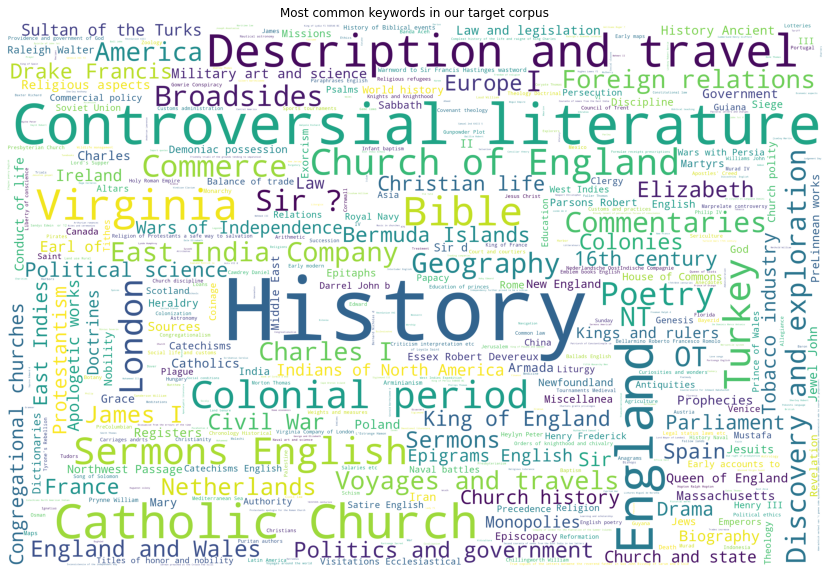

In [4]:
from functions import keywords
from collections import Counter
import os 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

kWords = {}
files = ['/srv/data/metadata/tuning/EPtuning.csv',
        '/srv/data/metadata/tuning/spreadsheet.csv',
        '/srv/data/metadata/tuning/keywords.csv',
        '/srv/data/metadata/tuning/people.csv']
for csvFile in files:
    kWords.update(keywords(csvFile))
words = []
for name, value in kWords.items():
    words.extend(list(value[0]))
counts = Counter(words)
word_cloud = WordCloud(background_color = "white", width=3000, height=2000, max_words=500, collocations=True).generate_from_frequencies(counts)
plt.figure(figsize=(20,10))
plt.imshow(word_cloud)
plt.axis("off")
plt.title('Most common keywords in our target corpus')
plt.show()